<a href="https://colab.research.google.com/github/adeethyiashankar/Wavelet-Based-Machine-Learning-Approaches-Towards-Precision-Medicine-in-Diabetes-Mellitus/blob/main/Code/UMAP_hmp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import os   # path
from time import time
from sklearn import manifold
!pip install umap-learn
import umap

from google.colab import drive
drive.mount('/content/gdrive')


     |████████████████████████████████| 80 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 11.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=aa875c1a0821888ece41888db949912b3b8f325052368bfbde8c1a85fc8c80d0
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=046ad0e82ac9a01d050b3ed04168ab7d9568b274c8a0c5a7d9c64fe2c8beeea5
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent
Mounted at /content/gdrive


In [ ]:
"""
  Based on hmp2-data.stanford.edu
  for TSNE and UMAP analysis
"""

subdir = '/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Preprocessed'  # Genus only prediabetes
fname  = 'nares_16s_abundance'
fname  = 'gut_16s_abundance'
fname  = 'RNAseq_abundance'
fname  = 'Proteomics'
fname  = 'Targ.proteomics'
fname  = 'Metabolomics'
fname  = 'Lipidomics'
fname  = 'cytokine_abundance'
fname  = 'Transcriptomics_VST_excl_3participants'

x = {}
subtitle = {}

fname0 = '/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Subjects.csv'
x[0]  = pd.read_csv(fname0, delimiter=',')    #  load data 
print(fname0)

subtitle[1] = 'Preprocessed'
fname1 = subdir + '/' + fname + '.csv'
x[1] = pd.read_csv(fname1, delimiter=',') 
print(fname1)

subtitle[2] = 'Denoised'
fname2 = subdir + '/Denoised/' + fname + '.csv'
x[2] = pd.read_csv(fname2, delimiter=',')
print(fname2)

subtitle[3] = 'WT Domain'
fname3 = subdir + '/WT Domain/' + fname + '.csv'
x[3]  = pd.read_csv(fname3, delimiter=',')
print(fname3)

subtitle[4] = 'Normalized'
fname4 = subdir + '/Normalized/' + fname + '.csv'
x[4] = pd.read_csv(fname4, delimiter=',')
print(fname4)

subtitle[5] = 'Normalized & Denoised'
fname5 = subdir + '/Normalized/Denoised/' + fname + '.csv'
x[5] = pd.read_csv(fname5, delimiter=',')
print(fname5)

subtitle[6] = 'Normalized & WT Domain'
fname6 = subdir + '/Normalized/WT Domain/' + fname + '.csv'
x[6] = pd.read_csv(fname6, delimiter=',')
print(fname6)

df = {};
for i in range(1,7):
  df[i] = x[i].iloc[:,7:]



/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Subjects.csv
/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Preprocessed/Transcriptomics_VST_excl_3participants.csv
/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Preprocessed/Denoised/Transcriptomics_VST_excl_3participants.csv
/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Preprocessed/WT Domain/Transcriptomics_VST_excl_3participants.csv
/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Preprocessed/Normalized/Transcriptomics_VST_excl_3participants.csv
/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Preprocessed/Normalized/Denoised/Transcriptomics_VST_excl_3participants.csv
/content/gdrive/MyDrive/Summer Research/hmp2-data-stanford/Preprocessed/Normalized/WT Domain/Transcriptomics_VST_excl_3participants.csv


In [ ]:
x[1]

,SampleID,Race,Sex,Age,BMI,SSPG,IR_IS_classification,genus_Actinomyces,genus_Anaerococcus,genus_Corynebacterium,genus_Dolosigranulum,genus_Finegoldia,genus_Fusobacterium,genus_Gemella,genus_Granulicatella,genus_Neisseria,genus_Peptoniphilus,genus_Porphyromonas,genus_Prevotella,genus_Propionibacterium,genus_Rothia,genus_Staphylococcus,genus_Streptococcus,genus_Streptophyta,genus_Veillonella,genus_unclassified_Actinomycetales,genus_unclassified_Bacteria,genus_unclassified_Neisseriaceae,Age_grp,BMI_grp
0,ZOZOW1T-1021,C,M,59.48,21.47,91.5,IS,0.000201,0.018822,0.273890,0.267393,0.006252,0.000179,0.000067,0.000357,0.000134,0.018666,0.000045,0.000067,0.053296,0.000156,0.116058,0.005158,0.003505,0.000335,0.006855,0.000491,0.005984,2,1
1,ZOZOW1T-4012,C,M,59.48,21.47,91.5,IS,0.000031,0.011138,0.273617,0.145174,0.003770,0.000094,0.000701,0.000389,0.000125,0.013335,0.000218,0.000000,0.029272,0.000016,0.062656,0.003552,0.000981,0.000436,0.002757,0.000125,0.002617,2,1
2,ZOZOW1T-53,C,M,59.48,21.47,91.5,IS,0.000894,0.000179,0.008448,0.002280,0.000089,0.097269,0.002727,0.002727,0.030307,0.000000,0.180859,0.055340,0.002548,0.001833,0.000760,0.019847,0.000134,0.045952,0.000000,0.001743,0.000894,2,1
3,ZOZOW1T-54,C,M,59.48,21.47,91.5,IS,0.000586,0.000000,0.000439,0.000073,0.000000,0.107807,0.003296,0.004248,0.038670,0.000000,0.142156,0.085250,0.000659,0.001245,0.000220,0.020214,0.000000,0.029222,0.000000,0.006006,0.000000,2,1
4,ZOZOW1T-55,C,M,59.48,21.47,91.5,IS,0.022139,0.002018,0.064170,0.009167,0.000000,0.073702,0.008514,0.008129,0.147980,0.001634,0.043760,0.132087,0.009782,0.006323,0.006227,0.070339,0.000711,0.038859,0.001268,0.001192,0.003306,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,ZJTKAE3-1011,C,F,58.65,31.24,162.0,IR,0.001492,0.070325,0.262498,0.000560,0.001828,0.000000,0.000597,0.000000,0.001753,0.022422,0.000373,0.000187,0.416281,0.000000,0.196090,0.002350,0.000224,0.000261,0.014737,0.000000,0.000037,2,3
512,ZJTKAE3-2012,C,F,58.65,31.24,162.0,IR,0.000000,0.048320,0.139845,0.002694,0.001360,0.000000,0.000000,0.000027,0.000381,0.023752,0.000000,0.000054,0.589063,0.000000,0.139927,0.001660,0.000626,0.001415,0.041790,0.000326,0.000000,2,3
513,ZJTKAE3-2013,C,F,58.65,31.24,162.0,IR,0.000202,0.053324,0.297534,0.001875,0.000288,0.000173,0.000548,0.000260,0.000375,0.011017,0.000000,0.000000,0.449286,0.000433,0.162999,0.001471,0.000000,0.000577,0.014477,0.000173,0.000000,2,3
514,ZJTKAE3-6011,C,F,58.65,31.24,162.0,IR,0.000000,0.030393,0.550516,0.031749,0.001147,0.001147,0.000912,0.000000,0.001199,0.023016,0.000000,0.001043,0.193046,0.000000,0.130722,0.001355,0.000704,0.000912,0.019836,0.000000,0.000052,2,3


In [ ]:
# df1 = x1.iloc[:,7:]

# df = {};
# for i in range(1,7):
#   df[i] = x[i].iloc[:,7:]


In [ ]:
ID = x[1].SampleID.str[0:7]

imethod = input('enter 1 for t-SNE, 2 for UMAP: ')
Y = {}

for i in range(1,7):
  x[i]['Age_grp']  = 1*(x[i]['Age']>25) + 1*(x[i]['Age']>50) + 1*(x[i]['Age']>60)
  x[i]['BMI_grp']  = 1*(x[i]['BMI']>19) + 1*(x[i]['BMI']>25) + 1*(x[i]['BMI']>30)

  if imethod == "1":
    method = 't-SNE'    # tSNE  UMAP
    tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=30)
    Y[i] = tsne.fit_transform(df[i])

  if imethod == "2":
    method = 'UMAP'    # tSNE  UMAP
    umap1 = umap.UMAP(n_components=2, random_state=10)
    Y[i] = umap1.fit_transform(df[i])

method


enter 1 for t-SNE, 2 for UMAP: 2


'UMAP'

Text(0.5, 0.92, 'Transcriptomics_VST_excl_3participants Based on UMAP')

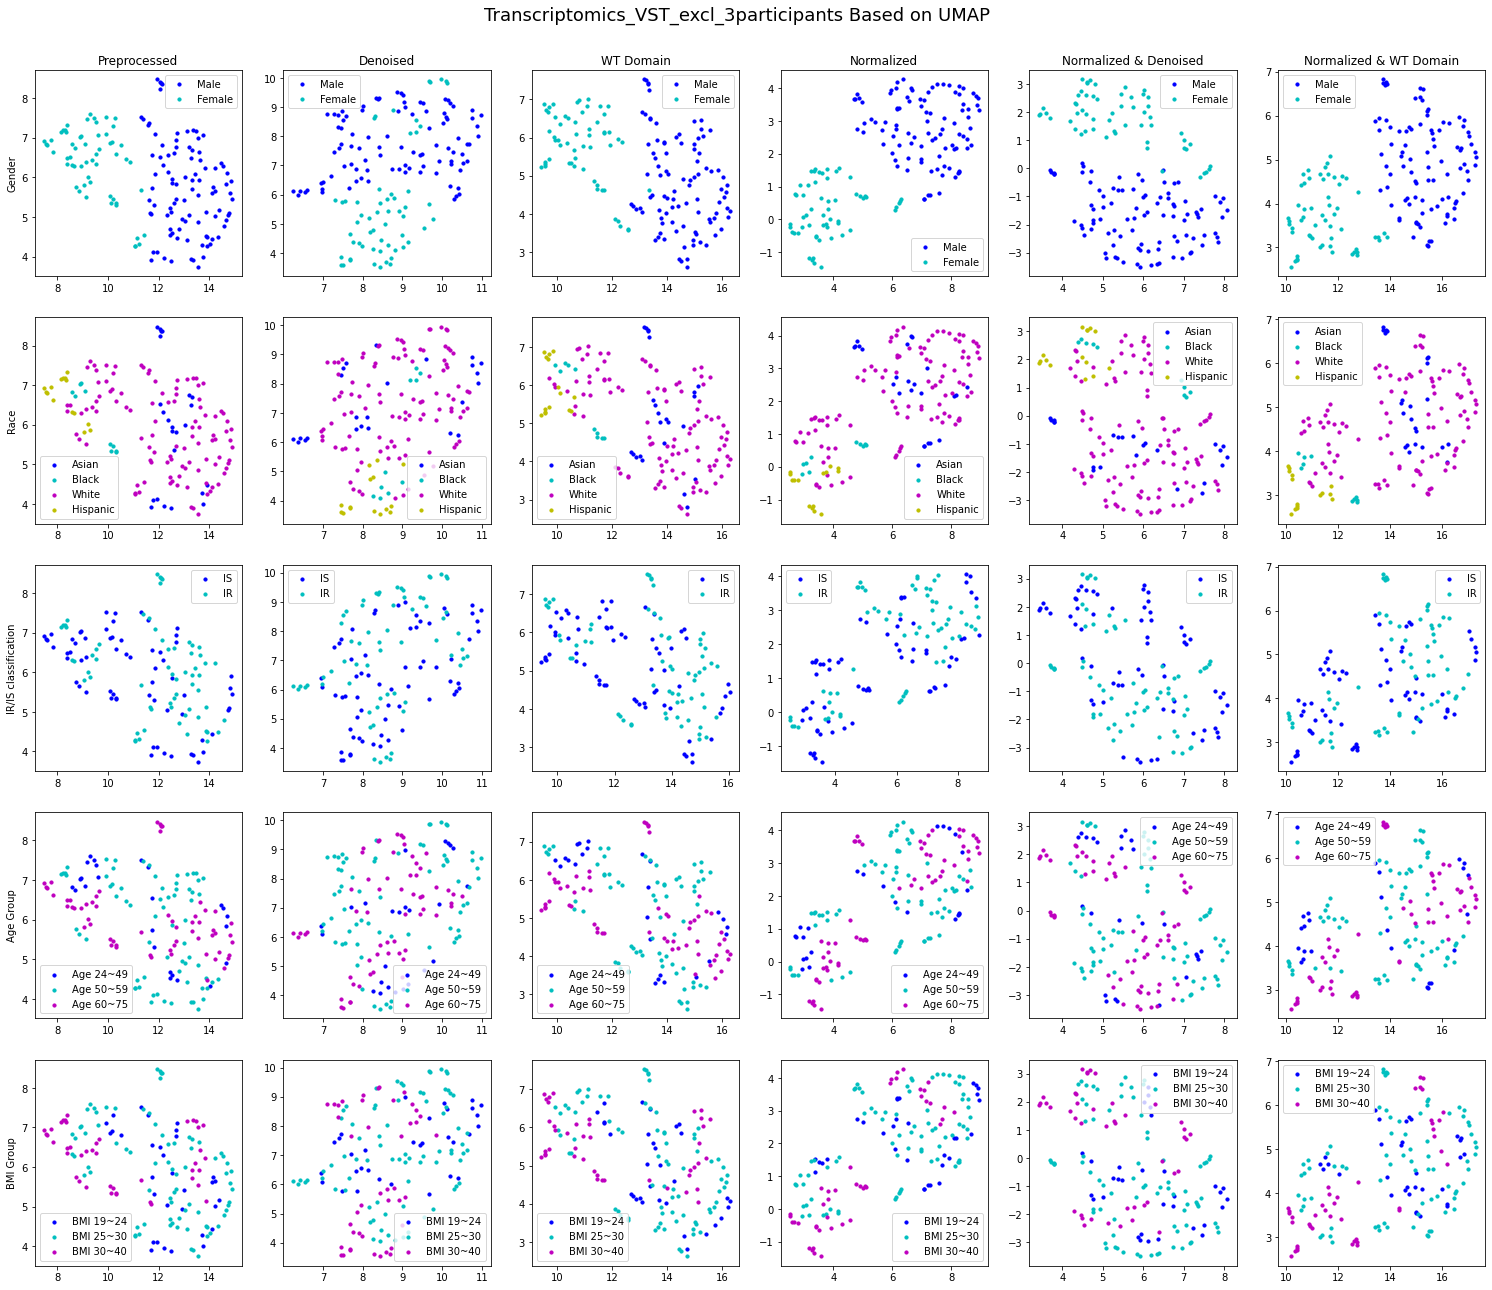

In [ ]:
# colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'lightgrey', 'orange', 'purple'
# colors = 'k', 'y', 'm', 'lightgrey', 'g', 'y', 'k', 'orange', 'purple'
# colors = 'g', 'b', 'g', 'm', 'orange', 'k', 'lightgrey', 'orange', 'purple'
colors = 'g', 'b', 'c', 'm', 'y', 'k', 'lightgrey', 'orange', 'purple'


(fig, subplots) = plt.subplots(5, 6, figsize=(26, 22))

for i in range(1,7):
  ax = subplots[0][i-1]
  ax.scatter(Y[i][x[i]['Sex'] == 'M', 0], Y[i][x[i]['Sex'] == 'M', 1], s=10, c=colors[1],  label='Male')
  ax.scatter(Y[i][x[i]['Sex'] == 'F', 0], Y[i][x[i]['Sex'] == 'F', 1], s=10, c=colors[2],  label='Female')
  if i==1:
    ax.set_ylabel('Gender')
  ax.legend()
  ax.set_title(subtitle[i])
  ax.axis('tight')

for i in range(1,7):
  ax = subplots[1][i-1]
  ax.scatter(Y[i][x[i]['Race'] == 'A', 0], Y[i][x[i]['Race'] == 'A', 1], s=10, c=colors[1],  label='Asian')
  ax.scatter(Y[i][x[i]['Race'] == 'B', 0], Y[i][x[i]['Race'] == 'B', 1], s=10, c=colors[2],  label='Black')
  ax.scatter(Y[i][x[i]['Race'] == 'C', 0], Y[i][x[i]['Race'] == 'C', 1], s=10, c=colors[3],  label='White')
  ax.scatter(Y[i][x[i]['Race'] == 'H', 0], Y[i][x[i]['Race'] == 'H', 1], s=10, c=colors[4],  label='Hispanic')
  if i==1:
    ax.set_ylabel('Race')
  ax.legend()
  ax.axis('tight')

for i in range(1,7):
  ax = subplots[2][i-1]
  ax.scatter(Y[i][x[i]['IR_IS_classification'] == 'IS', 0], Y[i][x[i]['IR_IS_classification'] == 'IS', 1], s=10, c=colors[1], label='IS')
  ax.scatter(Y[i][x[i]['IR_IS_classification'] == 'IR', 0], Y[i][x[i]['IR_IS_classification'] == 'IR', 1], s=10, c=colors[2], label='IR')
  if i==1:
    ax.set_ylabel('IR/IS classification')
  ax.legend()
  ax.axis('tight')

for i in range(1,7):
  ax = subplots[3][i-1]
  ax.scatter(Y[i][x[i]['Age_grp'] == 1, 0], Y[i][x[i]['Age_grp'] == 1, 1], s=10, c=colors[1], label='Age 24~49')
  ax.scatter(Y[i][x[i]['Age_grp'] == 2, 0], Y[i][x[i]['Age_grp'] == 2, 1], s=10, c=colors[2], label='Age 50~59')
  ax.scatter(Y[i][x[i]['Age_grp'] == 3, 0], Y[i][x[i]['Age_grp'] == 3, 1], s=10, c=colors[3], label='Age 60~75')
  if i==1:
    ax.set_ylabel('Age Group')
  ax.legend()
  ax.axis('tight')

for i in range(1,7):
  ax = subplots[4][i-1]
  ax.scatter(Y[i][x[i]['BMI_grp'] == 1, 0], Y[i][x[i]['BMI_grp'] == 1, 1], s=10, c=colors[1], label='BMI 19~24')
  ax.scatter(Y[i][x[i]['BMI_grp'] == 2, 0], Y[i][x[i]['BMI_grp'] == 2, 1], s=10, c=colors[2], label='BMI 25~30')
  ax.scatter(Y[i][x[i]['BMI_grp'] == 3, 0], Y[i][x[i]['BMI_grp'] == 3, 1], s=10, c=colors[3], label='BMI 30~40')
  if i==1:
    ax.set_ylabel('BMI Group')
  ax.legend()
  ax.axis('tight')


plt.suptitle(fname + ' Based on ' + method, y=0.92, fontsize=18)
   
